# PHASE 2 PROJECT
## GROUP MEMBERS
1. SHARON KALIKU
2. PAUL KAMAU
3. KIPKOSGEI KIPTUI
4. EZRA KIPCHIRCHIR
5. HERI KIMOTHO
## BUSINESS STAKEHOLDER
 The real estate agency 

## BUSINESS PROBLEM 
A real estate agency wants to analyze the factors that influence the prices of houses in order to provide accurate pricing estimates to their clients. The agency aims to understand the relationship between various features of a house, such as the number of rooms, living area, basement area, overall quality, and other relevant factors, and how they affect the sale price.

The clients being, homeowners and potential house buyers have difficulty in making informed decisions regarding property investments, to make this decision, understanding the factors influencing housing prices in a specific area is necessary.
## OBJECTIVES
REAL ESTATE AGENCY
- To identify the locations with the highest sales prices.
- To identify how seasonal trends affect sales.
- To predict prices of houses depending on the features.



Importing the necessary libraries that will be used to perform analysis on our data 

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('kc_house_data.csv')
areas = pd.read_csv('deliverylocations.csv')

Defining functions to load and view the data

In [279]:
# loading data

def desription_data(data):
    data = pd.read_csv(data)
    print("\n.............Info:.................")
    print(data.info())
    print("\n.............Describe:...............")
    print(data.describe())
    print("\n.............Head:.................")
    print(data.head())

In [280]:
desription_data('kc_house_data.csv')


.............Info:.................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat          

## Null values
Looking at the information above we can see only three columns have missing values, that is; "waterfront", "view" and "yr_renovated". Every house has its own unique features and not all are the same. Some houses contain certain features while others lack them. Since this is real world data, we can account for missing values in "waterfront" and "view" columns by saying not all houses are build the same and those lacking the two features have caused our data on the two columns to be inconsitent with the rest of the other columns. The "yr_renovated" column can also be accounted for by saying not all houses undergo renovation. Houses build earlier might need renovation but recent houses do not require renovation hence the missing values in the column
 

In [281]:
# Using mode to impute missing values
# Python function to impute missing values

def replace_missing_with_mode(data, column_name):
    mode_value = data[column_name].mode().iloc[0]  
    data[column_name].fillna(mode_value, inplace =True)

In [282]:
# columns to be imputed
replace_missing_with_mode(data,'view')
replace_missing_with_mode(data, 'waterfront')

In [283]:
# Changing our date from object to datetime data type
data['date'] = pd.to_datetime(data['date'])

After checking for null values, we check for any duplicated values in the data.

In [284]:
# Checking for duplicated values in our data
data.duplicated().sum()

0

In [285]:
# drop the rows in sqft_basement with a '?'
data= data.drop(data[data.sqft_basement == '?'].index)


Creating a new column 'Grade_1' that stores our new 'grade' column  after getting rid of the string 'grade' and converting it to a numeric datatype  

In [286]:
data["Grade_1"] = data["grade"].str.split().apply(lambda x: x[0])
# Convert the Grade1 column to an integer.
data["Grade_1"] = pd.to_numeric(data["Grade_1"])

### Converting the categorical columns to numerical data types

We are converting the following categorical data "Waterfront", "View" and  "grade" into numerical data  types.

In [287]:

data['view_1'] = data['view'].replace({'NONE': 0,'FAIR':1,'AVERAGE': 2,'GOOD':3, 'EXCELLENT':4})
data['waterfront_1'] = data['waterfront'].replace({'YES': 0, 'NO':1})
data['condition1'] = data['condition'].replace({'Poor': 0, 'Fair':1,'Average':2,'Good':3,'Very Good':4})


Since we have already replaced the strings in our categorical data with numeric values we can drop the original columns 

In [288]:
data.drop(columns = ['waterfront', 'view', 'grade','condition', ], inplace= True)

In [289]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
Grade_1                   int64
view_1                    int64
waterfront_1              int64
condition1                int64
dtype: object

 Delivery locations (zip codes) data 

In [290]:
# # Create a new dataframe with two columns for zip codes and cities
# new_areas = pd.DataFrame(columns=['Zip Code', 'City'])

# # Iterate over the original dataframe and extract zip codes and cities
# for i in range(len(areas.columns)):
#     # Skip the columns that are not zip codes
#     if i % 2 != 0:
#         continue
#     # Extract the zip codes and cities from each pair of columns
#     zip_codes = areas.iloc[:, i]
#     cities = areas.iloc[:, i + 1]
#     # Append the zip codes and cities to the new dataframe
#     new_areas = new_areas.append(pd.DataFrame({'Zip Code': zip_codes, 'City': cities}), ignore_index=True)

# # Print the new dataframe
# print(new_areas)

In [291]:
# new_areas.isnull().sum()
# new_areas.dropna()

In [292]:
# #renaming to match our first data set
# new_areas = new_areas.rename(columns={"Zip Code": "zipcode"})
# new_areas

In [293]:
# #merging our data sets
# new_areas['zipcode'] = new_areas['zipcode'].astype(str)
# data['zipcode'] = new_areas['zipcode'].astype(str)


# merged_data = pd.merge(new_areas, data , on='zipcode') 
# merged_data

In [294]:
# merged_data.isnull().sum()
# #dropping the rows with null values
# new_data = merged_data.dropna()

In [295]:
# def create_bar_graph(data):
#     # Count the occurrences of each city
#     city_counts = data['City'].value_counts()

#     # Select the top ten cities
#     top_cities = city_counts.head(10)

#     # Create a bar graph
#     plt.bar(top_cities.index, top_cities.values)
#     plt.xlabel('City')
#     plt.ylabel('Number of Houses')
#     plt.title('Top Ten Cities with the Most Houses')
#     plt.xticks(rotation=45)
#     plt.show()
    

# # Example usage:
# create_bar_graph(new_data)

In [296]:
# city_prices = new_data.groupby('City')['price'].mean()

# # Select the top ten cities with the highest mean prices
# top_ten_cities = city_prices.nlargest(10)

# # Create a bar graph
# top_ten_cities.plot(kind='bar', xlabel='City', ylabel='Price', title='Top Ten Cities with Highest Prices')

# # Show the plot
# plt.show()

# Data visualization
Now we have checked for abnormalities in the data, we can go ahead and plot the data to explore the distribution, relationships and patterns in the data. This will also help us in identifying outliers and trends.
 

In [297]:
y = data["price"]
X = data.drop("price", axis = 1)

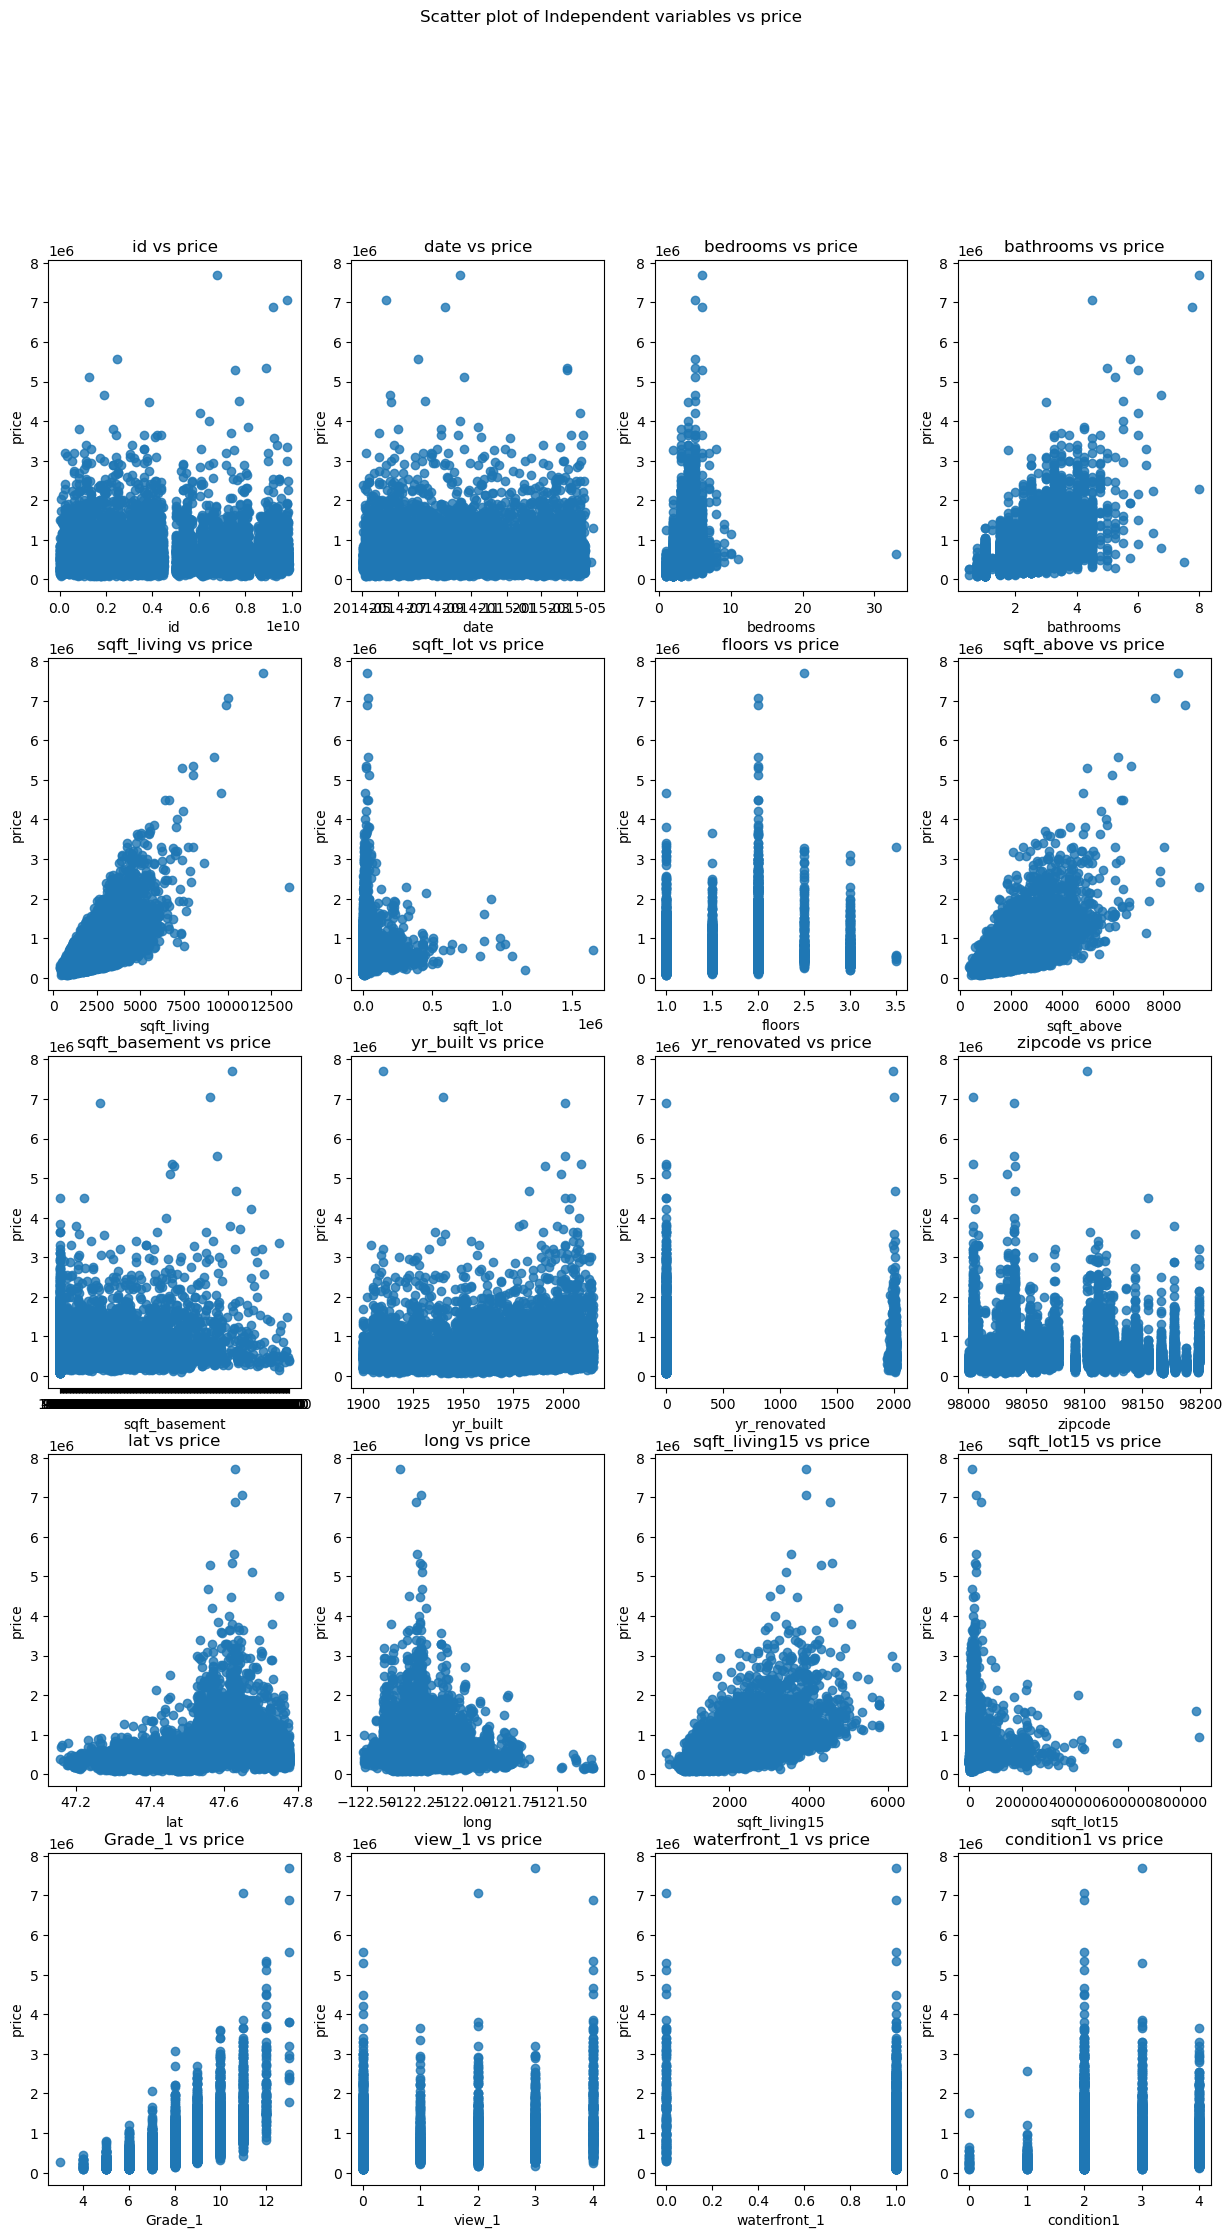

In [298]:
def scatter_plots(y, X):
    plots = X.shape[1]
    cols = 4
    rows = (plots + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    fig.suptitle(f"Scatter plot of Independent variables vs {y.name}")

    for i, ax in enumerate(axes.flat):
        if i < plots:
            x_col_name = X.columns[i]
            ax.scatter(X.iloc[:, i], y, alpha=0.8)
            ax.set_xlabel(x_col_name)
            ax.set_ylabel(y.name)
            ax.set_title(f"{x_col_name} vs {y.name}")
            



# Run the function
scatter_plots(y, X)


### Relationship between our independent variables and the dependent variable("price")

In [299]:
#correlation 
columns_to_test = data.columns

# computing the correlation matrix
correlation_matrix = data[columns_to_test].corr()
matrix = np.triu(np.ones_like(correlation_matrix, dtype = bool))
one_sided_correlation = correlation_matrix.mask(matrix)


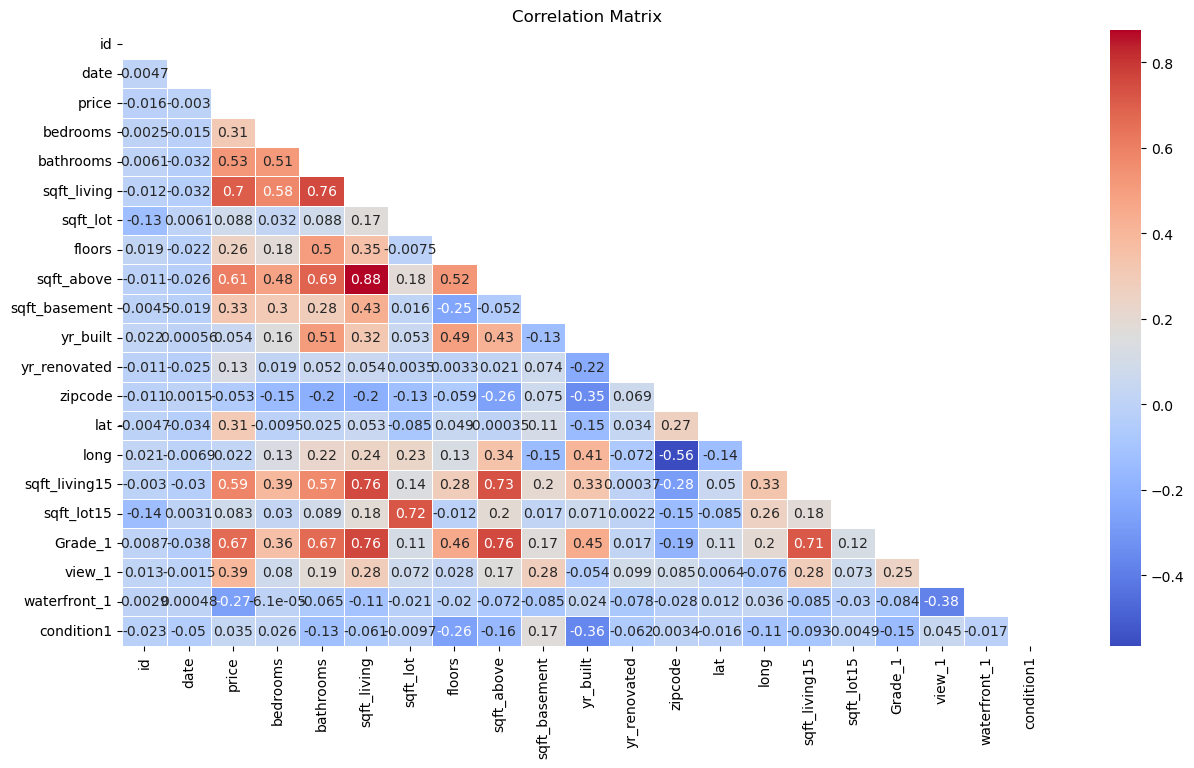

In [300]:
# using heatmap to visualize the correlation
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask = matrix)
plt.title(f'Correlation Matrix')
plt.show()

### Correlation of our columns against the target("price)


In [301]:
def correlation(df):
    
    return data.corr()['price'].sort_values()
    
correlation(data)

waterfront_1    -0.265969
zipcode         -0.053166
id              -0.015796
date            -0.002960
long             0.022101
condition1       0.035290
yr_built         0.054459
sqft_lot15       0.083192
sqft_lot         0.087937
yr_renovated     0.128227
floors           0.256355
lat              0.306507
bedrooms         0.309204
sqft_basement    0.325008
view_1           0.394885
bathrooms        0.525889
sqft_living15    0.586415
sqft_above       0.605143
Grade_1          0.667738
sqft_living      0.702328
price            1.000000
Name: price, dtype: float64

## Analyzing price and location

In [302]:
# def create_bar_graph(data):
#     # Count the occurrences of each city
#     city_counts = data['City'].value_counts()

#     # Select the top ten cities
#     top_cities = city_counts.head(10)

#     # Create a bar graph
#     plt.bar(top_cities.index, top_cities.values)
#     plt.xlabel('City')
#     plt.ylabel('Number of Houses')
#     plt.title('Top Ten Cities with the Most Houses')
#     plt.xticks(rotation=45)
#     plt.show()
    

# # Example usage:
# create_bar_graph(new_data)

In [303]:
# city_prices = new_data.groupby('City')['price'].mean()

# # Select the top ten cities with the highest mean prices
# top_ten_cities = city_prices.nlargest(10)

# # Create a bar graph
# top_ten_cities.plot(kind='bar', xlabel='City', ylabel='Price', title='Top Ten Cities with Highest Prices')

# # Show the plot
# plt.show()

## Analyzing seasonal trends in prices 

In [304]:
# # Creating a function to map months to seasons
# def get_season(date):
#     if date.month in [3,4,5]:
#         return 'Spring'
#     elif date.month in [6,7,8]:
#         return 'Summer'
#     elif date.month in [9,10,11]:
#         return 'Autumn'
#     else:
#         return 'Winter'


In [305]:
# Applying the function to the 'date' column to create a 'season' column
# data['season'] = data['date'].apply(get_season)
# data[['date', 'season']]

### Creating a boxplot of price segmented by season to view differences in price distribution by season.

In [306]:
# sns.boxplot(x='season', y='price', data=data);

### Making a timeseries plot of price over time, colored by season to see seasonal patterns.

In [307]:
# data.set_index('date').groupby('season')['price'].plot();

### Calculating summary statistics (mean, median, std dev) for price grouped by season to quantify differences.

In [308]:
# data.groupby('season')['price'].agg([np.mean, np.median, np.std])

In [309]:
# # Extract price by season into separate dataframes 
# spring = data[data['season'] == 'Spring']['price']
# summer = data[data['season'] == 'Summer']['price'] 
# fall = data[data['season'] == 'Autumn']['price']
# winter = data[data['season'] == 'Winter']['price']

# # Perform ANOVA test
# f_val, p_val = stats.f_oneway(spring, summer, fall, winter)  

# print(f_val, p_val)

# # Interpret results
# alpha = 0.05
# if p_val < alpha:
#   print("We reject the null hypothesis")
#   print("There is a statistically significant difference in price by season")  
# else:
#   print("We fail to reject the null hypothesis")
#   print("There is no statistically significant difference in price by season")

In this case; these are the hypotheses.

Null hypothesis:

There is no difference in the mean price across the seasons. The season has no effect on price.

H0: μspring = μsummer = μfall = μwinter

Alternative hypothesis:

There is a difference in mean price for at least one season compared to the others. The season has an effect on price.

H1: At least one μ season ≠ μ other seasons

Where μseason is the population mean price for that season.

So in summary: Null hypothesis (H0): The seasons all have an equal effect on mean price (no difference). Alternative hypothesis (H1): At least two seasons have a statistically significant difference in their effect on mean price. If we reject H0 based on a small ANOVA p-value, we would conclude there is a significant difference in price by season. Failing to reject H0 means we cannot say there is a seasonal effect.

## Linear Regression
Since we now have a better understanding of the correlation between our target("price") and our features("independent variables"), we  proceed to building regression models to further understand the magnitude our features have on price and predict whether this model can give us accurate house prices when fitted with the said features. We will explore a few features from our data set which we have investigated and come to a conclusion that they have a significance on our target.Steps involved here are as follows;
1. Feature Selection
2. Model Selection
3. Model training
4. Model evaluation
5. Model interpretation
6. Model validation and testing
7. **feature engineering

## 1.Feature selection
Here we just choose the endogenous and exogenous variables. First we will select for the baseline model then after we shall add features to see if it improves and evaluate it.

In [310]:
y= data["price"]
X = data["sqft_living"]

# 2. Building a baseline model
Creating  a baseline model for our regression  model

First we visualize the target(price) column in order to understand the distribution 

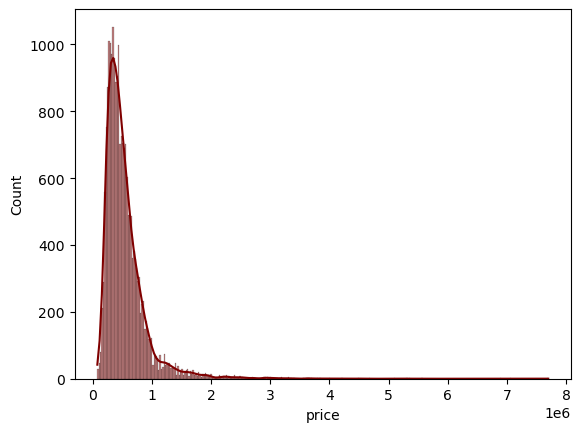

In [311]:
sns.histplot(data["price"], color="maroon", kde=True)
plt.show();

The distribution of our data seems to a have a longer right tail than the left tail. This indicates a positive skewness in our target meaning the mean is greater than the median. This may have impact on our model since linear regression, assume that the target variable follows a normal distribution, so significant skewness can be problematic.

### Splitting our data into train and test sets

First we split the data into test set and  training set. We will use the "train_test_split" function  from scikit-learn library to split our data. 

In [312]:
#importing scikit-learn library
from sklearn.model_selection import train_test_split
#defining a function for splitting data into train and test sets
def split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test


In [313]:
#splitting the data by calling the function
X_train, X_test, y_train, y_test = split(X,y)

In the train_test_split function we have is used above, we have split 80% of the data into training set and 20% of the data into test set.

In the next cell we are going to build a baseline model using the y_train and x_train variables. To do that we import statsmodels library which is a powerful library for statistical modelling and is similar to the sci-kit learn module

In [314]:
#importing statsmodels
import statsmodels.api as sm

In [315]:
#function to create models and print the summary
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:01:46   Log-Likelihood:            -2.3497e+05
No. Observations:               16914   AIC:                         4.700e+05
Df Residuals:                   16912   BIC:                         4.700e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.448e+04   4960.688     -8.966      0.000   -5.42e+04   -3.48e+04
sqft_living   280.1781      2.178    128.639      0.000     275.909     284.447
==============================================================================
Omnibus:                    11863.674   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           453836.272
Skew:                           2.904   Prob(JB):                         0.00
Kurtosis:                      27.703   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

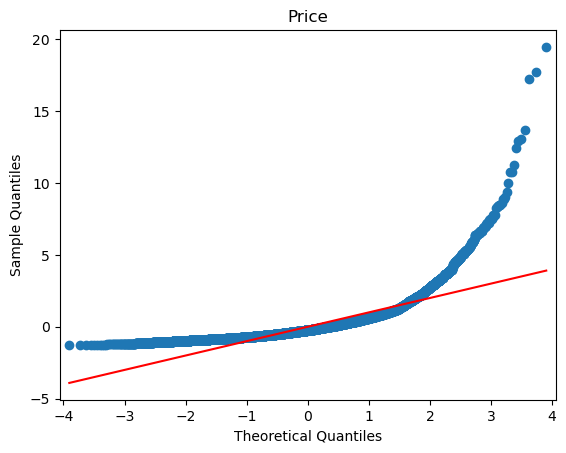

In [316]:
import scipy.stats as stats

# Generate a Q-Q plot
sm.qqplot(data["price"], line='s', fit=True, dist=stats.norm, loc=0, scale=1)
plt.title('Price')
plt.show()


Wonderful! We now have our baseline model and from it we can interpret its metrics
### Interpretation

Looking at the summary above, we can see that the regression line we found was

price = sqft_living285.8630 - 43,990

The model is statistically significant overall, with an F-statistic p-value well below 0.05. 
The model explains about 50% of the variance in price. 
The model `const` and `sqft_living`  coefficients  are both statistically significant, with t-statistic p-values well below 0.05. 
If a house had 0 sqft of living , we would expect price to be about -43,990 dollars. 
For each increase of 1 sqft in the living , we see an associated increase in price of about 280 dollars.
 


We now have our baseline model which we created using the train sets obtained from splitting our data. To analyze our model further we will predict our target("price") using the trained model then compare metrics to determine if our model is efficient or we need to adjust it. We also check if our model is under fitted or over fitted.
To perform comparisson we will import another module from sci-kit learn 

In [317]:
#predicting the dependent varible
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

#defining a function to calculate metrics for our prediction model
def calculate_regression_metrics(y_test, y_pred):
    metrics = {}

    # Calculate Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(y_test, y_pred)

    # Calculate Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (coefficient of determination)
    metrics['R-squared'] = r2_score(y_test, y_pred)

    return metrics


In [318]:
metrics = calculate_regression_metrics(y_test, y_pred)
print(metrics)

{'MAE': 177033.8779134571, 'MSE': 70202650031.35715, 'R-squared': 0.48779757847019756}


### Comparison of our baseline model against the prediction model

#### R-squared

Comparing the r-squared values from the test model  and and the prediction model we can note a difference. Our train model has a R-squared value of almost 50% while our test model has a value of almost 48%. This means our baseline model is good ...

#### Residuals


Residuals are the difference between the true values and the values predicted by our model. We visualize to understand the distribution and also check if it meets the assumption of linearity; that is normal distribution

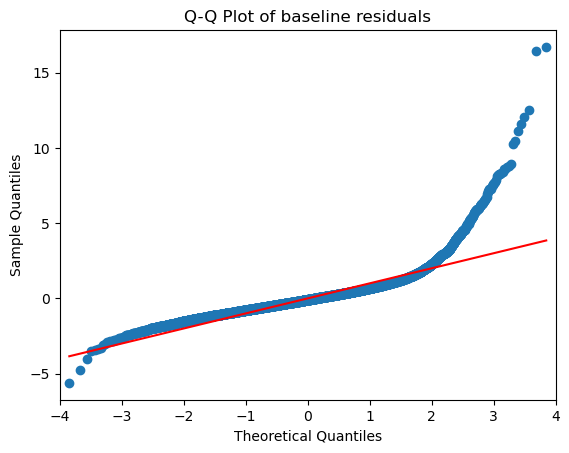

In [319]:
# Generate a Q-Q plot
sm.qqplot(results.resid, line='s', fit=True, dist=stats.norm, loc=0, scale=1)
plt.title('Q-Q Plot of baseline residuals')
plt.show()


Quantile-quantile plots are used to asses whether a dataset follows a specific theoretical normal distribution.
The visual above shows our model residuals almost follow a straight line but then curves at some point. The skewness or outliers in our target might be the cause of this.

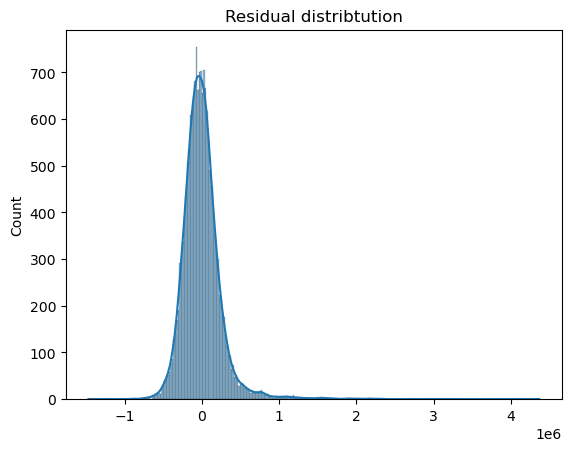

In [320]:
#ploting histogram to show residuals distribution
sns.histplot(results.resid, bins = "auto", kde = True)
plt.title("Residual distribtution")
plt.show();

From the above plot we can see that our baseline model residuals  have a normal distribution. This meets one of the linearity assumptions of linear regression. Linear models make key assumptions one of which is that the errors or residuals follow a normal distribution. The normality assumption is essential for valid statistical inferences and hypothesis testing. Non-normal residuals can lead to biased parameter estimates, incorrect p-values, and unreliable confidence intervals.

## Target transformation

The non-normal distribution shown by the residuals(where it curves above) can be accounted for by the skewness of our target. Transforming the target variable can be an effective approach to make the data more closely approximate a normal distribution. By transforming the target variable, you aim to reduce skewness and make the data more symmetric, thus bringing it closer to a normal distribution.
This, in turn, helps the residuals conform more closely to the normality assumption, which is crucial for the validity of the model. We shall log transform our target and see if our residuals will follow a normal distribution.

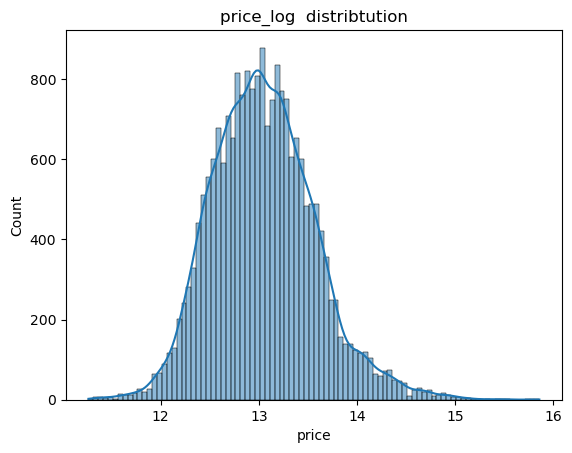

In [321]:
#log transforming the target
y_log = np.log(data["price"])
# visualizing to see its distribution
sns.histplot(y_log, bins = "auto", kde = True)
plt.title("price_log  distribtution")
plt.show();

Wonderful! Our target after transformation seems to follow an almost normal distribution. Next we create a model for the transformed target, then we shall visualize the residuals once again to see  their distribution. We will also check if it improves our model or not.

### Log transformed target model

In [322]:
#splitting data into test and train test
split(X, y_log)

##creating a model
log_model = sm.OLS(y_train, sm.add_constant(X_train))
log_results = log_model.fit()
log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:01:48   Log-Likelihood:            -2.3497e+05
No. Observations:               16914   AIC:                         4.700e+05
Df Residuals:                   16912   BIC:                         4.700e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.448e+04   4960.688     -8.966      0.000   -5.42e+04   -3.48e+04
sqft_living   280.1781      2.178    128.639      0.000     275.909     284.447
==============================================================================
Omnibus:                    11863.674   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           453836.272
Skew:                           2.904   Prob(JB):                         0.00
Kurtosis:                      27.703   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting the results of the model

From the summary above we can see that the regression line we found was

price = sqft_living0.0004 - 12.2207

The model is statistically significant overall, with an F-statistic p-value well below 0.05. 
The model explains about 48% of the variance in price. 
The model `const` and `sqft_living`  coefficients  are both statistically significant, with t-statistic p-values well below 0.05. 
If a house had 0 sqft of living , we would expect price to be about -12.2207 dollars. 
For each increase of 1 sqft in the living , we see an associated increase in price of about 0.0004 dollars.

### Prediction of our model

In [323]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

calculate_regression_metrics(y_test, y_pred)

{'MAE': 177033.8779134571,
 'MSE': 70202650031.35715,
 'R-squared': 0.48779757847019756}

Visualizing the transformed target residuals

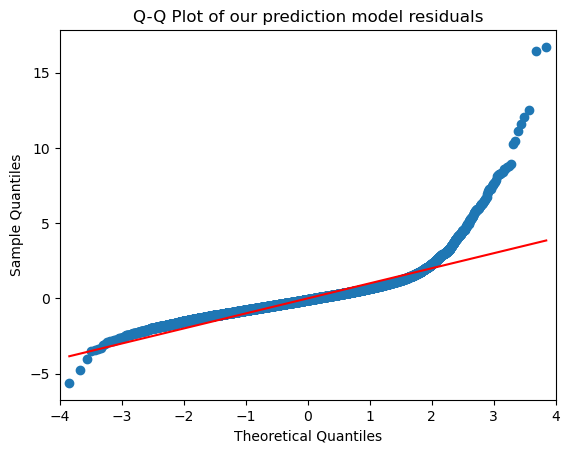

In [324]:



# Generate a Q-Q plot
sm.qqplot(log_results.resid, line='s', fit=True, dist=stats.norm, loc=0, scale=1)
plt.title('Q-Q Plot of our prediction model residuals')
plt.show()



The residuals of the log transformed target now follow a straight line compared to our first model. This is a good indication since it now meets the assumption of normal distribution.

### Evaluation between the two baseline models

The first baseline model is much better than the second baseline model since it explains almost 50% in variance of the target variable compared to the second one which explains almost 48%. The second model prediction is also very poor since it has a negative R-squared value which indicates that the regression model's fit to the data is worse  the model is not explaining any of the variance in the dependent variable, and it might be a poor fit for the data. 

## 2nd Model

In this model we are going to improve our first baseline model which we did't transform by adding more features and see if our model is going to improve. 

Selecting y and X variables for our model

In [325]:
#defining variables tu be used in our second model
drop = data.drop(['id', 'price', 'date','sqft_lot','floors','sqft_basement',  'yr_renovated', 'zipcode',
'lat', 'long', 'sqft_living15', 'sqft_lot15', "sqft_above"], axis= 1)
X_sec = drop
y_sec= data["price"]
X_sec

,bedrooms,bathrooms,sqft_living,yr_built,Grade_1,view_1,waterfront_1,condition1
0,3,1.00,1180,1955,7,0,1,2
1,3,2.25,2570,1951,7,0,1,2
2,2,1.00,770,1933,6,0,1,2
3,4,3.00,1960,1965,7,0,1,4
4,3,2.00,1680,1987,8,0,1,2
...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,2009,8,0,1,2
21593,4,2.50,2310,2014,8,0,1,2
21594,2,0.75,1020,2009,7,0,1,2
21595,3,2.50,1600,2004,8,0,1,2


In this model we have standardized the X variables (features) to have a mean of 0 and a standard deviation of 1 is known as standardization or z-score normalization.Scaling the features to have a standard deviation of 1 ensures that the features have the same variance, which can be important for modelling algorithms.Standardizing the features can help make the data closer to a normal distribution, which can improve the model's performance for such models.


In [326]:
ss = StandardScaler()

X1_scaled = ss.fit_transform(X_sec)

splitting data into train and test

In [327]:
split(X1_scaled, y_sec)


(array([[-1.48401584, -1.45225804, -1.32921762, ..., -0.30450233,
          0.08222884, -0.63018235],
        [ 1.75959687,  0.1742605 , -0.28406466, ..., -0.30450233,
          0.08222884,  0.90713684],
        [ 0.67839263,  0.49956421,  0.23851182, ..., -0.30450233,
          0.08222884,  0.90713684],
        ...,
        [-1.48401584, -0.47634691, -0.4364828 , ..., -0.30450233,
          0.08222884,  0.90713684],
        [-0.40281161, -0.47634691,  0.06431966, ..., -0.30450233,
          0.08222884, -0.63018235],
        [-0.40281161, -0.47634691, -0.55623991, ..., -0.30450233,
          0.08222884, -0.63018235]]),
 array([[ -0.40281161,   1.15017163,   1.03326355, ...,  -0.30450233,
           0.08222884,   0.90713684],
        [ -0.40281161,  -0.15104321,   0.15141574, ...,   2.31314057,
           0.08222884,   0.90713684],
        [ -0.40281161,   0.49956421,   1.53406601, ...,   4.93078347,
         -12.16118276,   0.90713684],
        ...,
        [  0.67839263,   0.1742605 ,

Building multiple linear model

In [328]:
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:01:50   Log-Likelihood:            -2.3497e+05
No. Observations:               16914   AIC:                         4.700e+05
Df Residuals:                   16912   BIC:                         4.700e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.448e+04   4960.688     -8.966      0.000   -5.42e+04   -3.48e+04
sqft_living   280.1781      2.178    128.639      0.000     275.909     284.447
==============================================================================
Omnibus:                    11863.674   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           453836.272
Skew:                           2.904   Prob(JB):                         0.00
Kurtosis:                      27.703   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our model is good overall with an R-squared value of 65% meaning it explains 65 % ov variance in our target variable. The p-values of our independent variables are below 0.05 meaning our model is statistically significant overall.

In [329]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

calculate_regression_metrics(y_test, y_pred)


{'MAE': 177033.8779134571,
 'MSE': 70202650031.35715,
 'R-squared': 0.48779757847019756}

### Comparing the train and test model of our multiple linear model

The R-squared of our train model is 65% and that of our test model is also 65%. This is can be an indication that our model is performing consistently between the training and test datasets. This can be a positive sign, suggesting that our model has not overfit the training data. This is a good model because the test model has not predicted more than what the train model predicted

metrics

## 3. Polynomial  Transformation of  features

We will use polynomial transformation to see if our model will improve or not.

In [330]:
# Polynomial transforming
y_pol= data["price"]
X_pol = X_sec
X_pol

,bedrooms,bathrooms,sqft_living,yr_built,Grade_1,view_1,waterfront_1,condition1
0,3,1.00,1180,1955,7,0,1,2
1,3,2.25,2570,1951,7,0,1,2
2,2,1.00,770,1933,6,0,1,2
3,4,3.00,1960,1965,7,0,1,4
4,3,2.00,1680,1987,8,0,1,2
...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,2009,8,0,1,2
21593,4,2.50,2310,2014,8,0,1,2
21594,2,0.75,1020,2009,7,0,1,2
21595,3,2.50,1600,2004,8,0,1,2


He we also standardized our data to have a mean of 0 and standard deviation of 1

In [331]:
ss = StandardScaler()

X1_scaled = ss.fit_transform(X_pol)

splitting the data

In [332]:
split(X1_scaled, y_sec)


(array([[-1.48401584, -1.45225804, -1.32921762, ..., -0.30450233,
          0.08222884, -0.63018235],
        [ 1.75959687,  0.1742605 , -0.28406466, ..., -0.30450233,
          0.08222884,  0.90713684],
        [ 0.67839263,  0.49956421,  0.23851182, ..., -0.30450233,
          0.08222884,  0.90713684],
        ...,
        [-1.48401584, -0.47634691, -0.4364828 , ..., -0.30450233,
          0.08222884,  0.90713684],
        [-0.40281161, -0.47634691,  0.06431966, ..., -0.30450233,
          0.08222884, -0.63018235],
        [-0.40281161, -0.47634691, -0.55623991, ..., -0.30450233,
          0.08222884, -0.63018235]]),
 array([[ -0.40281161,   1.15017163,   1.03326355, ...,  -0.30450233,
           0.08222884,   0.90713684],
        [ -0.40281161,  -0.15104321,   0.15141574, ...,   2.31314057,
           0.08222884,   0.90713684],
        [ -0.40281161,   0.49956421,   1.53406601, ...,   4.93078347,
         -12.16118276,   0.90713684],
        ...,
        [  0.67839263,   0.1742605 ,

Building the polynomial model

In [335]:
def build_polynomial_linear_model(X, y, degree=2):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Reshape X to be 2D
    X_reshaped = X.values.reshape(-1, 1)

    X_poly = poly.fit_transform(X_reshaped)

    # Add a constant term (intercept)
    X_poly = sm.add_constant(X_poly)

    # Build and fit a linear regression model using statsmodels
    model = sm.OLS(y, X_poly).fit()

    return model



### Interpreting the polynomial results

Our model is good overall with an R-squared value of 71% meaning it explains 71 % ov variance in our target variable. The p-values of our independent variables are below 0.05 meaning our model is statistically significant overall.

coefficients and p_values

In [338]:

# Access the p-values of coefficients
p_values = model.sum



AttributeError: 'OLS' object has no attribute 'pvalues'

In [ ]:
model.pvalues["sqft_living"]

AttributeError: 'OLS' object has no attribute 'pvalues'

Prediction metrics

In [ ]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

calculate_regression_metrics(y_test, y_pred)

{'MAE': 177033.8779134571,
 'MSE': 70202650031.35715,
 'R-squared': 0.48779757847019756}

### Comparing the polynomial train and test model

On looking on the metrics of the two models we can say that our training data did well in training the model. We can  see that the training model has a R-squared value of 65 while our training model has a R-squared of 71%. This shows our test model predicts well since it did not exceed the training model value and it also means that we did not overfit our data.